In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('./Data/chess_numeric.csv')
df["diff_elo"] = abs(df["white_elo"] - df["black_elo"])
df = df.loc[(df["ply_count"] > 20) & (df["ply_count"] < 150)]
# Seleccionar las características de interés
X = df[['diff_elo', 'variant', 'termination']]
y = df['ply_count']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

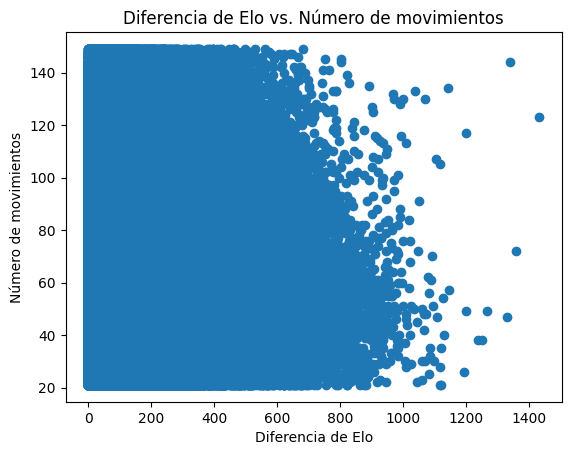

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df["diff_elo"], df['ply_count'])
plt.title("Diferencia de Elo vs. Número de movimientos")
plt.xlabel("Diferencia de Elo")
plt.ylabel("Número de movimientos")
plt.show()

In [32]:
pd.options.display.float_format = '{:.2f}'.format
df.loc[:, "ply_count"].describe()

count   1395525.00
mean         67.53
std          26.94
min          21.00
25%          48.00
50%          64.00
75%          84.00
max         149.00
Name: ply_count, dtype: float64

Mean Squared Error (MSE): 533.192813934136
R-squared (R2): 0.0931324661551991


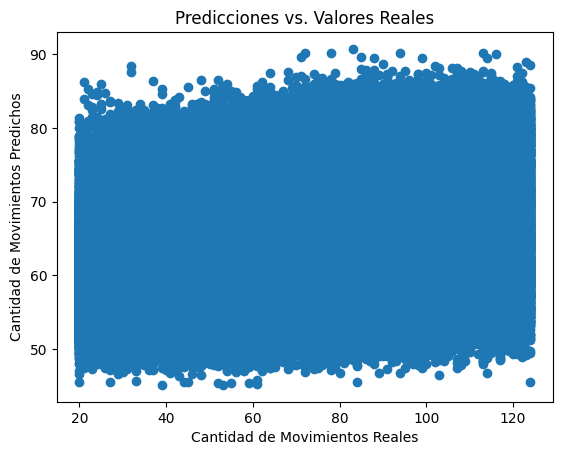

In [2]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráfico de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Cantidad de Movimientos Reales')
plt.ylabel('Cantidad de Movimientos Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.show()


Mean Squared Error (MSE): 671.1080278151467
R-squared (R2): -0.14143714285569842


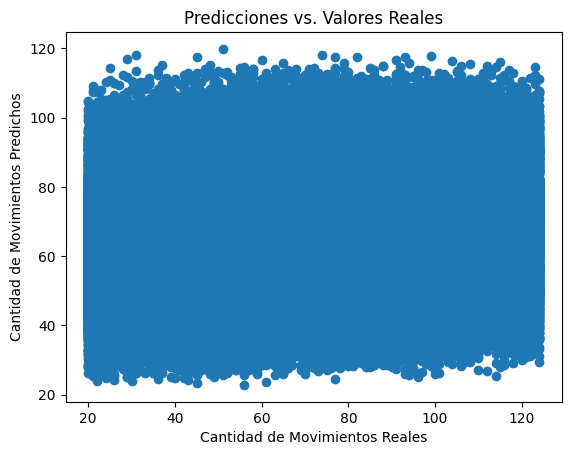

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráfico de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Cantidad de Movimientos Reales')
plt.ylabel('Cantidad de Movimientos Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.show()


Mean Squared Error (MSE): 522.0207164151296
R-squared (R2): 0.1121342461120205


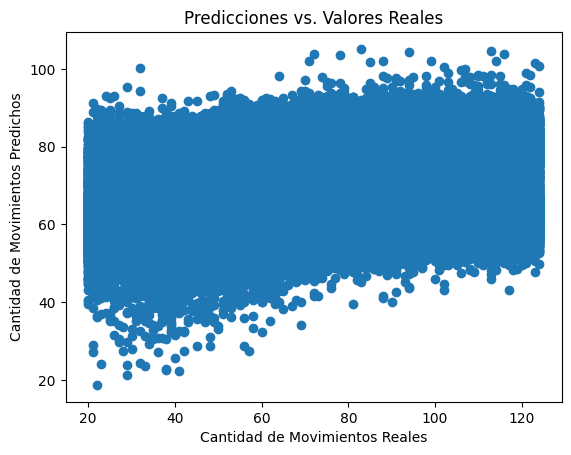

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Crear un modelo de regresión polinómica de grado 2
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred_poly = polyreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráfico de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Cantidad de Movimientos Reales')
plt.ylabel('Cantidad de Movimientos Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Mean Squared Error (MSE): 647.2324545800809
R-squared (R2): -0.10082897700466797


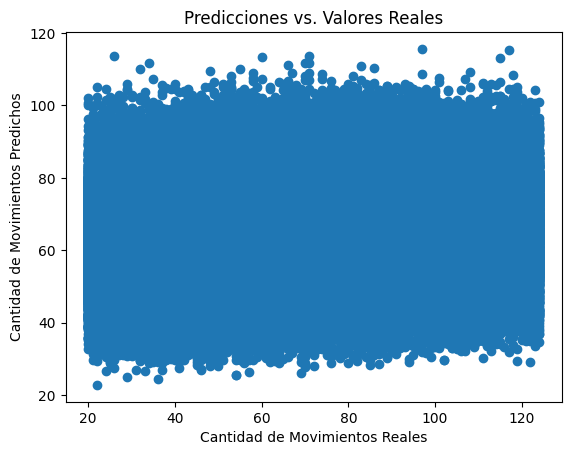

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un modelo de regresión K-NN
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Ajusta el número de vecinos según sea necesario
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráfico de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Cantidad de Movimientos Reales')
plt.ylabel('Cantidad de Movimientos Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.show()